## V=u+at </br>
- V: Final velocity </br>
- u: Initial velocity </br>
- a: Acceleration </br>
- t: Time </br>

In this laboratory exercise, you are going to analyze some data using linear regression and RANSAC methods. Before building a model to describe data, it is necessary to condition the data so that outliers are removed. In our case, our data may be corrupted with noise and outliers. In this lab, we are going to study the use of linear regression and RANSAC methods to analyze the data under the influence of noise and outliers. After filtering the outliers, we build a model to model the conditioned data and extract insight from the model built.
We have a practical scenario that a car is placed on a ramp. The car moves down the slope due to gravity. We have a speed camera to measure the speed of the car at different time t. The measured speed in m/s and the time t in second are saved in a csv file named “Line.csv”. We assume the data stored in this file is free of noise and outliers. Our task is to study the use of linear regression method and RANSAC regression method to analyze data under the influence of noise and outliers. After filtering outliers, a model is built based on the conditioned data. Finally, we extract as much insight as possible from the model built.

在這個實驗室練習中，您將使用線性迴歸和RANSAC方法分析一些數據。 在構建描述數據的模型之前，有必要對數據進行條件化，以便刪除異常值。 在我們的情況下，我們的數據可能會因噪聲和異常值而損壞。 在本實驗室中，我們將研究使用線性迴歸和RANSAC方法在噪聲和異常值的影響下分析數據。 過濾異常值後，我們構建了一個模型來建模條件數據，並從構建的模型中提取洞察力。
我們有一個實際的場景，一輛車被放置在斜坡上。 汽車因重力而下坡。 我們有一個速度相機來測量汽車在不同時間t的速度。 以 m/s 爲單位的測量速度和以秒爲單位的時間 t 保存在名爲"Line.csv"的 csv 文件中。 我們假設存儲在這個文件中的數據沒有噪聲和異常值。 我們的任務是研究線性迴歸法和RANSAC迴歸法對噪聲和離羣值的影響下的數據進行分析。 過濾離羣值後，基於條件數據構建模型。 最後，我們從構建的模型中提取儘可能多的見解。

# Part A: Ideal case – data with no noise and outliers

The csv file “Line.csv” stores speed and time data of the car moving down the slope. The data essentially has no noise and outliers. It is the ideal situation that the speed camera working perfectly measuring the speed of the car, v, at different time, t. A Python program with filename “LinearRegression09.py” is given. Place the “Line.csv” file in the same folder as “LinearRegression08.py” file and run the program. 

csv 文件"Line.csv"存儲了汽車下坡的速度和時間數據。 數據基本上沒有噪聲和異常值。 這是速度相機完美測量汽車速度的理想情況，v，在不同的時間，t，給出了一個文件名"LinearRegression09.py "的Python程序。 將"Line.csv"文件放在與"LinearRegression08.py "文件相同的文件夾中並運行該程序。

Linear regression model (without noise): Coefficients = [[4.9]]  intercept = [15.]
y = [4.9] * x  +  [15.]


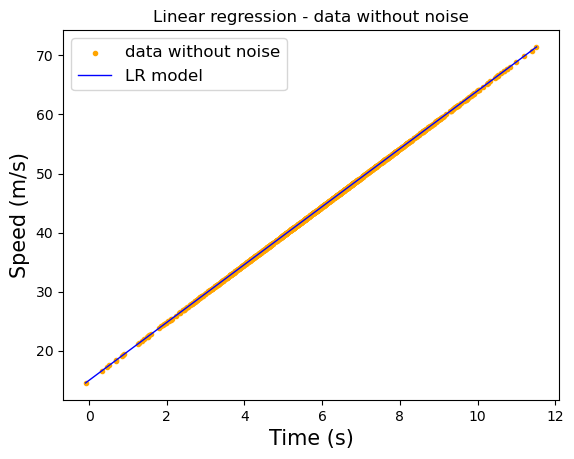

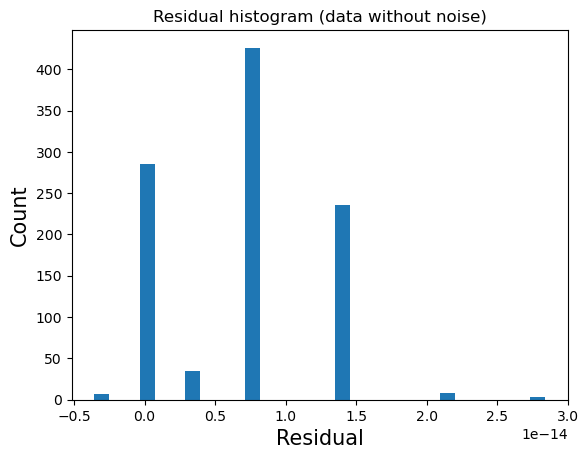

When x = [14.], y = [83.6]


In [90]:
%run LinearRegression09.py

# Part 2: Data corrupted with noise

In this part, we add some Gaussian noise to the speed data to simulate the speed signal being corrupted with noise. The following line of Python code generates noise and adds to vector y.

在這一部分中，我們在速度數據中添加了一些高斯噪聲，以模擬速度信號被噪聲破壞的情況。 下列 Python 代碼生成噪聲並添加到向量 y。

```
#add some noise to y
y = y + np.random.normal(0, 1.5, size=(n_samples, 1))

plt.scatter(
   x, y, color="orange", marker=".", label="data with noise"
)

plt.title('Linear regression - data with noise')
print( f'Linear regression model (with noise): Coefficients = {reg.coef_}  intercept = {reg.intercept_}' )
```
--
```
plt.title('Residual histogram (data with noise)')
```

Linear regression model (with noise): Coefficients = [[4.89138762]]  intercept = [15.02910932]
y = [4.89138762] * x  +  [15.02910932]


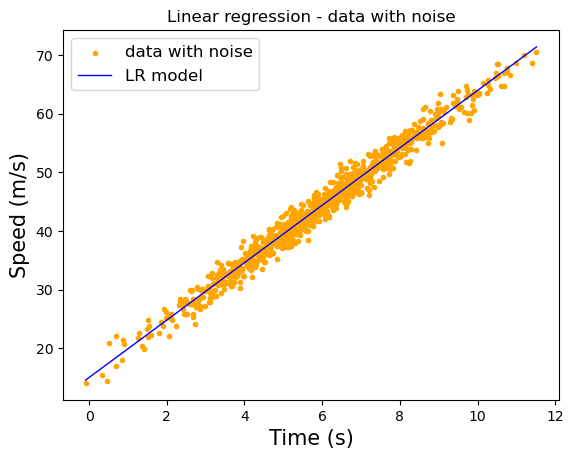

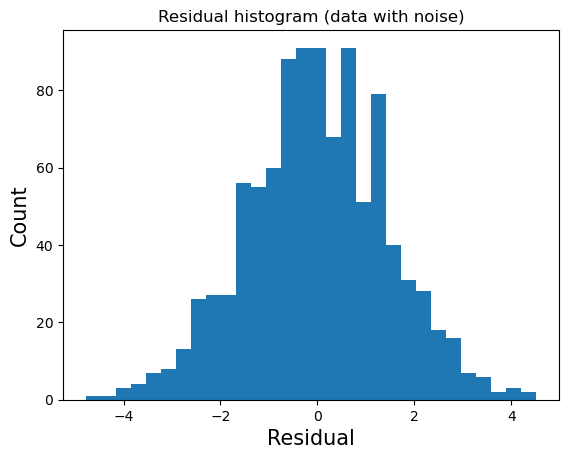

When x = [14.], y = [83.50853595]


In [91]:
%run LinearRegression09WithNoise.py

# Part 3: Data corrupted with noise and outliers

In this part, in addition to adding noise to the data, we add some outliers to test the linear regression method. We will add the following lines of codes to the program in part 2.

在這一部分中，除了給數據添加噪聲外，我們還添加了一些離羣值來測試線性迴歸方法。 我們將在第2部分向程序添加以下代碼行

```
# **********************
# Create outlier data
n_outliers = 200
np.random.seed(0)
x_outlier =  np.random.normal(8.0, 1.0, size=(n_outliers, 1))
y_outlier =  np.random.normal(10.0, 0.5, size=(n_outliers, 1))

# Plot the outliers
plt.scatter(
   x_outlier, y_outlier, color="green", marker=".", label="outliers"
)

# *********************************************************
# append outliers to x and y
x = np.concatenate( (x, x_outlier), axis=0)
y = np.concatenate( (y.reshape(n_samples, 1), y_outlier), axis=0 )
# **********************
```

Linear regression model (with noise and outliers): Coefficients = [[1.37008013]]  intercept = [29.66544355]
y = [1.37008013] * x  +  [29.66544355]


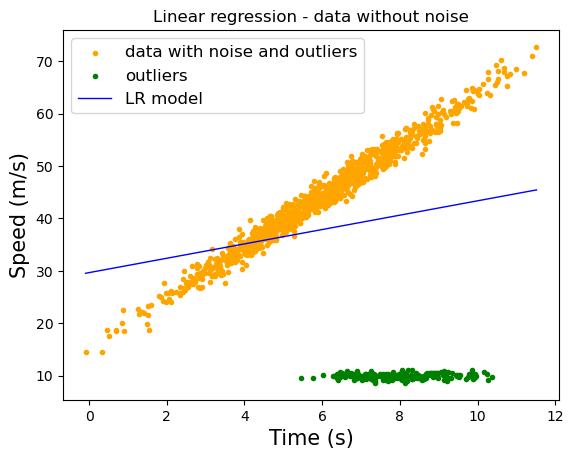

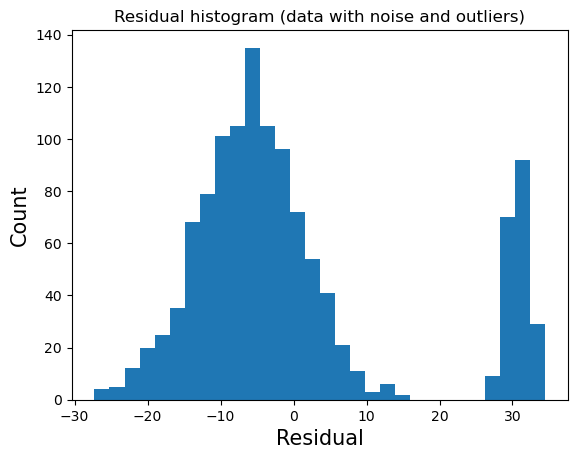

When x = [14.], y = [48.84656542]


In [92]:
%run LinearRegression09WithNoiseAndOutliers.py

# Part 4: Use of RANSAC regression method

In part 3, we note that linear regression method is not a good method to model data under the influence of noise and outliers. To solve this problem, we use RANSAC regression method instead. Provided program file “RANSAC_RegressorLineExample08.py” is a Python program making use of RANSAC regression method to model the data corrupted with noise and outliers. 

在第3部分，我們注意到線性迴歸方法不是在噪聲和離羣值影響下對數據進行建模的好方法。 爲了解決這個問題，我們使用RANSAC迴歸方法。 提供的程序文件"RANSAC_RegressorLineExample08.py"是一個Python程序，它使用RANSAC迴歸方法來模擬因噪聲和異常值而損壞的數據。

RANSAC regression model (with noise and outliers): Coefficients = [[4.89508537]]  intercept = [15.01179384]
y = [4.89508537] * x  +  [15.01179384]


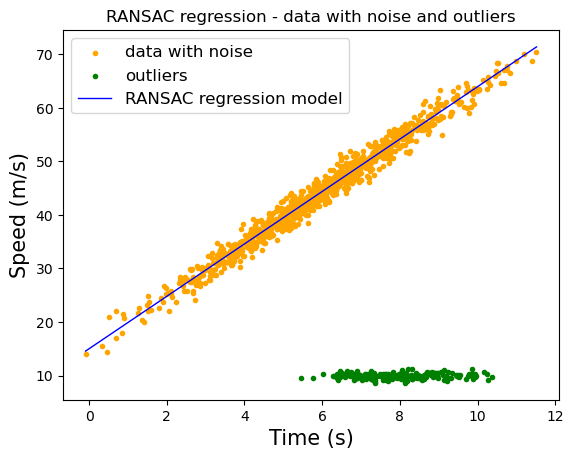

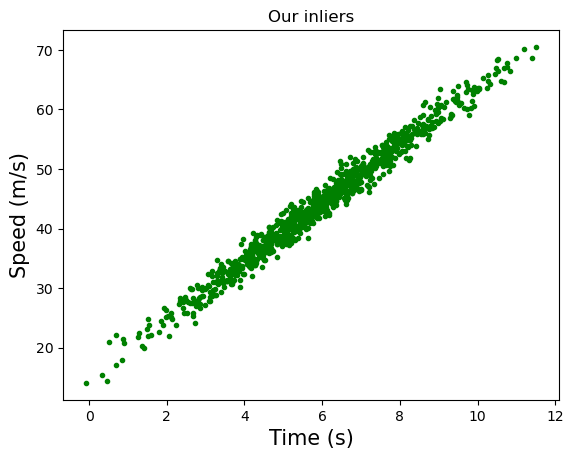

Linear regression model (using only inliers): Coefficients = [[4.89508537]]  intercept = [15.01179384]
y = [4.89508537] * x  +  [15.01179384]


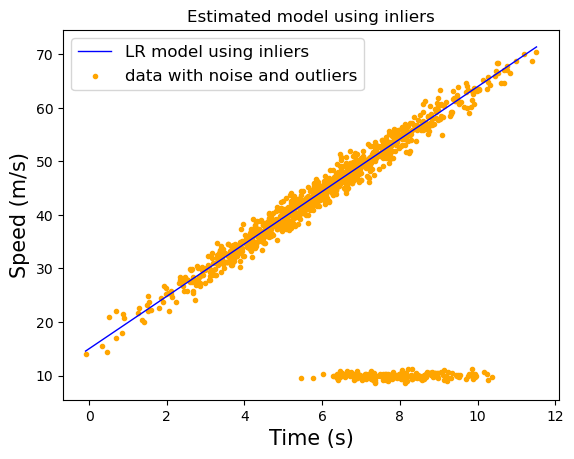

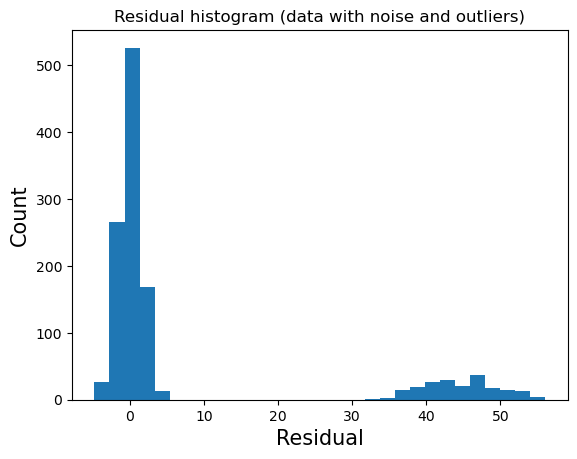

When x = [14.], y = [83.54298904]


In [93]:
%run RANSAC_RegressorLineExample09.py